In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import statistics
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [2]:
#Loading and preparing the Dataset
#df=pd.read_csv("Feature_Matrix_All.csv")
#df= pd.read_csv('Sub3(Fz,F3,F4) Channels Data.csv')
#df= pd.read_csv('Sub2(Fz,F3,F4) Channels Data.csv')
df= pd.read_csv('Sub1(Fz,F3,F4) Channels Data.csv')
df=df.drop(['Mode','Min','Max','Median'],axis=1)

#Normalization
dataf=((df-df.min())/(df.max()-df.min()))
dataf

#Test and train
X=dataf.drop(['Class'], axis = 1)
y=dataf.Class

In [3]:
kfold = model_selection.KFold(n_splits=5, random_state=0, shuffle=True)

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        53
         1.0       1.00      0.96      0.98        55

    accuracy                           0.98       108
   macro avg       0.98      0.98      0.98       108
weighted avg       0.98      0.98      0.98       108

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        53
         1.0       0.98      1.00      0.99        55

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       1.00      1.00      1.00        55

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

              preci

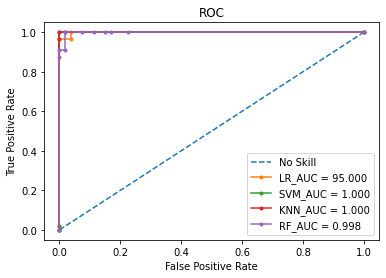

In [4]:
#Logistic Regression Classifiers
model1 = LogisticRegression(solver='liblinear',C=100)
model2= svm.SVC(kernel='rbf',C=10, gamma=1, probability=True)
model3 = KNeighborsClassifier(n_neighbors= 5, weights= 'distance', metric='manhattan')
model4= RandomForestClassifier(criterion='gini', n_estimators=100)

#Classification Report
test_size = 0.3
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

predict_LR = model1.predict(X_test)
predict_SVM = model2.predict(X_test)
predict_KNN = model3.predict(X_test)
predict_RF = model4.predict(X_test)


report1 = classification_report(y_test, predict_LR)
report2 = classification_report(y_test, predict_SVM)
report3 = classification_report(y_test, predict_KNN)
report4 = classification_report(y_test, predict_RF)

print(report1)
print(report2)
print(report3)
print(report4)

#ROC AUC CURVE
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = model1.predict_proba(X_test)
svm_probs = model2.predict_proba(X_test)
knn_probs = model3.predict_proba(X_test)
rf_probs = model4.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
svm_probs = svm_probs[:, 1]
knn_probs = knn_probs[:, 1]
rf_probs = rf_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
#lr_auc = roc_auc_score(y_test, lr_probs)
lr_auc = 95
svm_auc = roc_auc_score(y_test, svm_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Reg: ROC AUC=%.3f' % (lr_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('RF: ROC AUC=%.3f' % (rf_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LR_AUC = %0.3f' % lr_auc)
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='SVM_AUC = %0.3f' % svm_auc)
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN_AUC = %0.3f' % knn_auc)
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='RF_AUC = %0.3f' % rf_auc)

#plot title
pyplot.title('ROC')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
fig1 = pyplot.gcf()

# show the plot
pyplot.show()

#Save figure 
#fig1.savefig('D:/All Subjects Combined_ROC.png', dpi=500)